In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gstools as gs

from pykrige.ok  import OrdinaryKriging

In [2]:
data = pd.read_csv("red13.dat", delimiter=";")
data = data.set_index("Hole ID")
data

,Northing,Elevation,"Thickness, m",Au [g/t],Ag [g/t],"Cu, percent","Zn, percent",Rock Type
Hole ID,,,,,,,,
67,20341.5,-36.0,0.34,2.16,6.17,2.82,2.2,20
68,20344.0,-66.0,5.04,2.88,9.94,7.39,2.3,20
69,20303.0,-47.0,0.29,0.00,2.40,0.22,0.0,20
71,20305.0,-96.0,0.45,0.62,4.11,0.70,0.0,20
72,20260.0,-100.0,1.19,1.65,6.86,2.57,0.1,20
...,...,...,...,...,...,...,...,...
133,20176.0,-163.0,5.01,2.38,16.76,5.31,1.0,20
134,20281.0,-235.0,1.06,0.29,2.67,1.39,4.0,20
136,20227.0,-157.0,1.96,1.35,2.06,1.11,0.1,20


In [3]:
data.keys()

Index(['Northing', 'Elevation', 'Thickness, m', ' Au [g/t]', ' Ag [g/t]',
       'Cu, percent', 'Zn, percent', 'Rock Type'],
      dtype='object')

In [4]:
help(gs.Exponential)

Help on class Exponential in module gstools.covmodel.models:

class Exponential(gstools.covmodel.base.CovModel)
 |  Exponential(dim=3, var=1.0, len_scale=1.0, nugget=0.0, anis=1.0, angles=0.0, integral_scale=None, rescale=None, latlon=False, var_raw=None, hankel_kw=None, **opt_arg)
 |  
 |  The Exponential covariance model.
 |  
 |  Notes
 |  -----
 |  This model is given by the following variogram [Webster2007]_:
 |  
 |  .. math::
 |     \gamma(r)=
 |     \sigma^{2}
 |     \left(1-\exp\left(-s\cdot\frac{r}{\ell}\right)\right)+n
 |  
 |  Where the standard rescale factor is :math:`s=1`.
 |  
 |  References
 |  ----------
 |  .. [Webster2007] Webster, R. and Oliver, M. A.
 |         "Geostatistics for environmental scientists.",
 |         John Wiley & Sons. (2007)
 |  
 |  
 |  Parameters
 |  ----------
 |  dim : :class:`int`, optional
 |      dimension of the model. Default: ``3``
 |  var : :class:`float`, optional
 |      variance of the model (the nugget is not included in "this" v

In [5]:
help(gs.SRF)

Help on class SRF in module gstools.field.srf:

class SRF(gstools.field.base.Field)
 |  SRF(model, mean=0.0, normalizer=None, trend=None, upscaling='no_scaling', generator='RandMeth', **generator_kwargs)
 |  
 |  A class to generate spatial random fields (SRF).
 |  
 |  Parameters
 |  ----------
 |  model : :any:`CovModel`
 |      Covariance Model of the spatial random field.
 |  mean : :class:`float` or :any:`callable`, optional
 |      Mean of the SRF (in normal form). Could also be a callable.
 |      The default is 0.0.
 |  normalizer : :any:`None` or :any:`Normalizer`, optional
 |      Normalizer to be applied to the SRF to transform the field values.
 |      The default is None.
 |  trend : :any:`None` or :class:`float` or :any:`callable`, optional
 |      Trend of the SRF (in transformed form).
 |      If no normalizer is applied, this behaves equal to 'mean'.
 |      The default is None.
 |  upscaling : :class:`str`, optional
 |      Method to be used for upscaling the variance

In [6]:
help(gs.Stable)

Help on class Stable in module gstools.covmodel.models:

class Stable(gstools.covmodel.base.CovModel)
 |  Stable(dim=3, var=1.0, len_scale=1.0, nugget=0.0, anis=1.0, angles=0.0, integral_scale=None, rescale=None, latlon=False, var_raw=None, hankel_kw=None, **opt_arg)
 |  
 |  The stable covariance model.
 |  
 |  Notes
 |  -----
 |  This model is given by the following correlation function
 |  [Wackernagel2003]_:
 |  
 |  .. math::
 |     \rho(r) =
 |     \exp\left(- \left(s\cdot\frac{r}{\ell}\right)^{\alpha}\right)
 |  
 |  Where the standard rescale factor is :math:`s=1`.
 |  :math:`\alpha` is a shape parameter with :math:`\alpha\in(0,2]`
 |  
 |  References
 |  ----------
 |  .. [Wackernagel2003] Wackernagel, H. "Multivariate geostatistics",
 |         Springer, Berlin, Heidelberg (2003)
 |  
 |  Other Parameters
 |  ----------------
 |  alpha : :class:`float`, optional
 |      Shape parameter. Standard range: ``(0, 2]``
 |      Default: ``1.5``
 |  
 |  
 |  Parameters
 |  --------

[ 0.34  5.04  0.29  0.45  1.19  1.74 18.86  3.68 15.71  0.    2.34  1.56
  5.71  1.5   1.64  0.16  1.01  5.07  0.76  7.4   0.83 12.83  2.58  0.
  0.35  4.31  1.64  0.36  1.62  0.34  0.    0.42  1.21  0.73  2.69 11.88
  6.23  5.89  0.    1.43 12.52  7.82  5.9   0.38  8.4   0.    0.67  0.3
  0.    0.    0.27  0.13  7.86  1.71  1.39  2.61  1.93  3.53  1.07  6.21
  0.53  0.48  5.01  1.06  1.96  4.03  1.73]


/usr/local/lib64/python3.10/site-packages/gstools/field/plot.py:368: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot: title={'center': 'Field 2D unstructured: (67,)'}, xlabel='$x$', ylabel='$y$'>

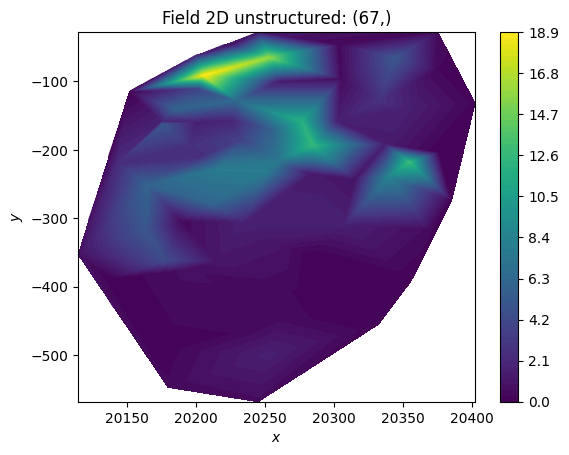

In [7]:
x = data["Northing"].values
y = data["Elevation"].values
values = data["Thickness, m"].values
print(values)

model = gs.Exponential(dim=2, var=2)

plotter = gs.field.Field(dim=2)
plotter(pos=(x, y), field=values)
plotter.plot()

Stable(dim=2, var=16.8, len_scale=16.9, nugget=2.42e-13, alpha=2.0)


/usr/local/lib64/python3.10/site-packages/gstools/covmodel/plot.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


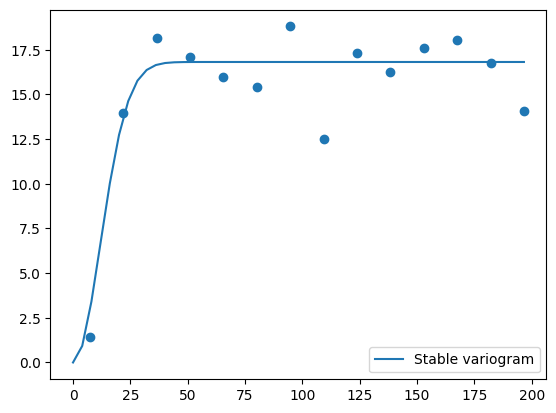

In [8]:
bin_center, gamma = gs.vario_estimate((x, y), values)
fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=True)
ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
print(fit_model)

In [15]:
grid = gs.tools.generate_grid((x,y))
krige = gs.krige.Ordinary(fit_model, (x, y), values)
krige(grid)

(array([0.34      , 5.00237317, 1.80310887, ..., 3.10157856, 4.03      ,
        1.73      ]),
 array([5.04485342e-13, 7.23609113e-01, 8.61383943e+00, ...,
        4.49603053e+00, 8.52651283e-13, 4.83169060e-13]))

<AxesSubplot: title={'center': 'Field 2D unstructured: (4489,)'}, xlabel='$x$', ylabel='$y$'>

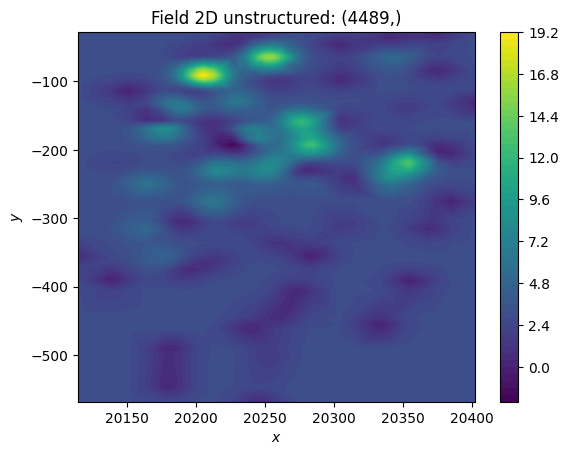

In [16]:
krige.plot()

In [18]:
krige((x,y)) - values

array([[ 4.95159469e-14, -2.39808173e-14,  4.09672296e-14,
         4.74065232e-14,  4.21884749e-14,  1.59872116e-14,
        -2.38031816e-13,  5.90638649e-14, -1.81188398e-13,
         3.02152487e-14,  1.90958360e-14,  4.61852778e-14,
         6.21724894e-15,  1.68753900e-14,  5.72875081e-14,
         1.55986335e-14, -8.88178420e-16, -2.13162821e-14,
         3.90798505e-14, -6.92779167e-14,  3.91908728e-14,
        -1.82964754e-13,  4.57411886e-14,  2.75332621e-14,
         1.48214774e-14, -5.59552404e-14,  2.19824159e-14,
         1.59317004e-14,  6.66133815e-14, -4.44089210e-15,
         2.78416309e-14,  6.14508444e-14,  2.24265051e-14,
         4.64073224e-14, -2.66453526e-15, -1.36779477e-13,
        -8.34887715e-14, -1.07469589e-13,  5.36025521e-14,
        -8.88178420e-16, -1.38555833e-13, -5.59552404e-14,
        -6.39488462e-14,  6.21724894e-14, -7.63833441e-14,
         4.30134097e-14,  3.17523785e-14,  3.84692278e-14,
         4.19697957e-14,  4.41367559e-14,  3.55826479e-1

In [27]:
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV

param_dict = {
    "method": ["ordinary", "universal"],
    "variogram_model": ["exponential", "gaussian", "spherical"],
    # "nlags": [4, 6, 8],
    # "weight": [True, False]
}

estimator = GridSearchCV(Krige(), param_dict, verbose=True, return_train_score=True)

X = np.array((x,y)).T
print(X.shape)
estimator.fit(X=X, y=values)

(67, 2)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_poin

GridSearchCV(estimator=Krige(),
             param_grid={'method': ['ordinary', 'universal'],
                         'variogram_model': ['exponential', 'gaussian',
                                             'spherical']},
             return_train_score=True, verbose=True)

In [28]:
if hasattr(estimator, "best_score_"):
    print("best_score R² = {:.3f}".format(estimator.best_score_))
    print("best_params = ", estimator.best_params_)

print("\nCV results::")
if hasattr(estimator, "cv_results_"):
    for key in [
        "mean_test_score",
        "mean_train_score",
        "param_method",
        "param_variogram_model",
    ]:
        print(" - {} : {}".format(key, estimator.cv_results_[key]))

best_score R² = -0.104
best_params =  {'method': 'universal', 'variogram_model': 'spherical'}

CV results::
 - mean_test_score : [-0.35838847 -0.82236282 -0.32762925 -0.12827424 -0.78924063 -0.10441339]
 - mean_train_score : [1. 1. 1. 1. 1. 1.]
 - param_method : ['ordinary' 'ordinary' 'ordinary' 'universal' 'universal' 'universal']
 - param_variogram_model : ['exponential' 'gaussian' 'spherical' 'exponential' 'gaussian' 'spherical']
